In [17]:
import numpy as np
import gym

# Hyperparameters
EPISODES = 1000
MAX_STEPS = 100
LEARNING_RATE = 0.81 
GAMMA = 0.96
epsilon = 0.9  # Exploration parameter
RENDER = False  # Set to True to render the environment

# Create the Gym environment
env = gym.make('FrozenLake-v1')
state_space_size = env.observation_space.n
action_space_size = env.action_space.n

# Initialize the Q-table
Q = np.zeros((state_space_size, action_space_size))
Q

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [26]:
rewards = []

for episode in range(EPISODES):
    state = env.reset()

    # print(f"initial state: {state}")
    state = 0
    for _ in range(MAX_STEPS):
        if RENDER:
            env.render()

        # Exploration vs. Exploitation
        if np.random.uniform(0, 1) < epsilon:
            action = env.action_space.sample()
        else:
            action = np.argmax(Q[state, :])

        # next_state, reward, done, _ = env.step(action)
        result = env.step(action)
        new_state, reward, done, info, additional_info = result
        # print(f"print: {state}")

        # Update the Q-table
        Q[state, action] = Q[state, action] + LEARNING_RATE * (reward + GAMMA * np.max(Q[next_state, :]) - Q[state, action])

        state = next_state

        if done:
            rewards.append(reward)
            epsilon -= 0.001
            break  # Reached the goal

print(Q)
print(f"Average reward: {sum(rewards) / len(rewards)}")

[[1.92387337e-08 1.27691900e-02 1.94911529e-08 1.92515203e-08]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.000000

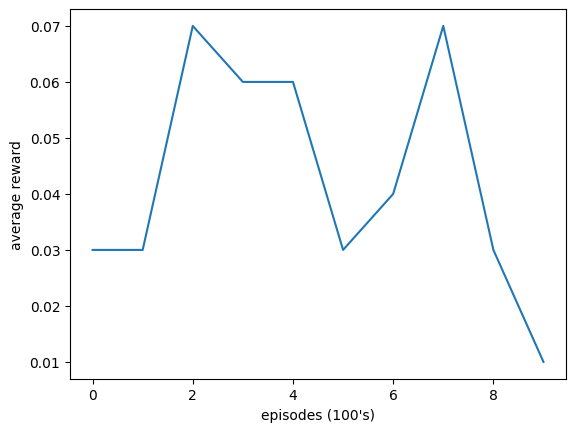

In [27]:
# we can plot the training progress and see how the agent improved
import matplotlib.pyplot as plt

def get_average(values):
  return sum(values)/len(values)

avg_rewards = []
for i in range(0, len(rewards), 100):
  avg_rewards.append(get_average(rewards[i:i+100])) 

plt.plot(avg_rewards)
plt.ylabel('average reward')
plt.xlabel('episodes (100\'s)')
plt.show()